In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
import seaborn as sns

In [40]:
bac2018_lp_muestra2=pd.read_csv('bac2018_lp_muestra2.csv')

In [41]:
bac2018_lp_muestra1=pd.read_csv('bac2018_lp_muestra1.csv')

In [42]:
bac2018_lp_muestra2

,ocid,year,tender/status,tender/procurementMethod,tender/value/amount,tender/tenderPeriod/durationInDays,tender/items/0/quantity,outliers_value_amount,outliers_duration,outliers_cantidad
0,ocds-bulbcf-101-0311-LPU18,2018,complete,open,7.200000e+06,6.0,1.0,5.855357,0.666667,1.000000
1,ocds-bulbcf-101-0629-LPU18,2018,complete,open,1.780000e+07,9.0,1.0,16.148104,0.333333,1.000000
2,ocds-bulbcf-101-0880-LPU18,2018,complete,open,9.979200e+06,12.0,9072.0,8.553999,1.333333,26.404834
3,ocds-bulbcf-101-1001-LPU18,2018,complete,open,3.563852e+06,12.0,55.0,2.324607,1.333333,0.836858
4,ocds-bulbcf-101-1002-LPU18,2018,complete,open,1.744380e+06,6.0,96.0,0.557875,0.666667,0.712991
5,ocds-bulbcf-101-1077-LPU18,2018,complete,open,7.855000e+06,11.0,365.0,6.491371,1.000000,0.099698
6,ocds-bulbcf-101-1135-LPU18,2018,complete,open,2.283000e+06,7.0,12.0,1.080883,0.333333,0.966767
7,ocds-bulbcf-101-1597-LPU18,2018,complete,open,2.400000e+07,12.0,1.0,22.168389,1.333333,1.000000
8,ocds-bulbcf-101-1607-LPU18,2018,complete,open,1.158462e+07,11.0,8019713.0,10.112889,1.000000,24227.737160
9,ocds-bulbcf-101-1623-LPU18,2018,complete,open,4.200000e+07,14.0,1.0,39.646637,2.000000,1.000000


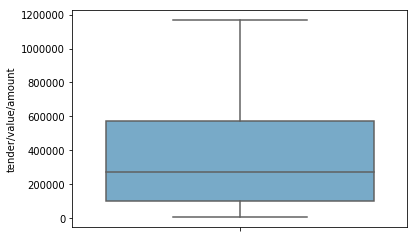

In [22]:
df = bac2018_lp_muestra1
sns.boxplot( y=df["tender/value/amount"], palette="Blues");

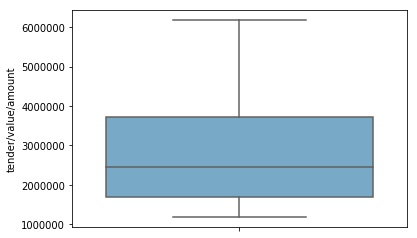

In [44]:
df = bac2018_lp_muestra2[bac2018_lp_muestra2['outliers_value_amount']<=5]
sns.boxplot( y=df["tender/value/amount"], palette="Blues");

In [46]:
bac2018_lp_muestra2=bac2018_lp_muestra2[bac2018_lp_muestra2['outliers_value_amount']<=5]

## Estandarizacion

In [47]:
X1 = bac2018_lp_muestra1.iloc[:,4:7].values

X2 = bac2018_lp_muestra2.iloc[:,4:7].values

y1 = bac2018_lp_muestra1.iloc[:,2].values
y2 = bac2018_lp_muestra2.iloc[:,2].values



In [48]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X1std = StandardScaler().fit_transform(X1)
X2std = StandardScaler().fit_transform(X2)


In [49]:
X1std

array([[ 2.03918849,  0.50824663, -0.30934476],
       [ 1.36961895, -0.37527141, -0.30941447],
       [ 1.53622545, -0.37527141, -0.31011158],
       ...,
       [-0.38132113, -0.37527141, -0.31011158],
       [-0.22414518, -0.59615092, -0.31011158],
       [ 1.03053384, -0.81703043, -0.30997216]])

In [50]:
X2std

array([[ 0.52052304,  0.4428138 , -0.35143047],
       [-0.80195143, -0.6949053 , -0.3511121 ],
       [-0.41045803, -0.50528545, -0.35176438],
       ...,
       [-0.90107859, -1.26376485, -0.35176438],
       [-0.54347071,  0.25319395, -0.3518265 ],
       [-1.07682978, -0.88452515, -0.3006067 ]])

In [51]:
np.set_printoptions(suppress=True)

# Calculamos la matriz de covarianza

Tiene 1 en la diagonal principal, al estandarizar las variables su varianza es igual a 1. 

In [52]:

X1_cov=np.cov(X1std.T)
print('Matriz de covarianza de los datos estandarizados 1: \n%s' %np.cov(X1std.T))

Matriz de covarianza de los datos estandarizados 1: 
[[1.00144928 0.21781388 0.24891959]
 [0.21781388 1.00144928 0.07215991]
 [0.24891959 0.07215991 1.00144928]]


In [53]:
pd.DataFrame(np.cov(X_std17.T), columns=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity']).to_excel('cov17.xlsx', index=False)

NameError: name 'X_std17' is not defined

In [54]:
X2_cov=np.cov(X2std.T)

print('Matriz de covarianza de los datos estandarizados 2: \n%s' %np.cov(X2std.T))

Matriz de covarianza de los datos estandarizados 2: 
[[1.00194175 0.09059408 0.11623805]
 [0.09059408 1.00194175 0.04474245]
 [0.11623805 0.04474245 1.00194175]]


In [50]:
pd.DataFrame(np.cov(X_std18.T), columns=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity']).to_excel('cov18.xlsx', index=False)

# Calculamos los autovalores y autovectores de la matriz y los mostramos


In [55]:
cov_mat1 = np.cov(X1std.T)

eig_vals1, eig_vecs1 = np.linalg.eig(X1_cov)

print('Autovectores \n%s' %eig_vecs1)
print('\nAutovalores \n%s' %eig_vals1)

Autovectores 
[[ 0.6678198   0.74363843  0.03191545]
 [ 0.50222115 -0.41854042 -0.75670194]
 [ 0.54935474 -0.52136915  0.65298053]]

Autovalores 
[1.37001561 0.70433861 0.92999361]


In [56]:
cov_mat2 = np.cov(X2std.T)

eig_vals2, eig_vecs2 = np.linalg.eig(X2_cov)

print('Autovectores \n%s' %eig_vecs2)
print('\nAutovalores \n%s' %eig_vals2)

Autovectores 
[[ 0.65240586  0.75261153  0.08912059]
 [ 0.4957115  -0.33481817 -0.80135317]
 [ 0.57326845 -0.5669856   0.59151552]]

Autovalores 
[1.17291528 0.87406988 0.95884009]


In [57]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals1[i]), eig_vecs1[:,i]) for i in range(len(eig_vals1))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente

for i in eig_pairs:
    print('Autovalores en orden descendiente:')
    print(i[0])
    print('Autovectores:')
    print(i[1])
    

Autovalores en orden descendiente:
1.370015610680749
Autovectores:
[0.6678198  0.50222115 0.54935474]
Autovalores en orden descendiente:
0.9299936053995016
Autovectores:
[ 0.03191545 -0.75670194  0.65298053]
Autovalores en orden descendiente:
0.7043386100067057
Autovectores:
[ 0.74363843 -0.41854042 -0.52136915]


In [58]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals2[i]), eig_vecs2[:,i]) for i in range(len(eig_vals2))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente

for i in eig_pairs:
    print('Autovalores en orden descendiente:')
    print(i[0])
    print('Autovectores:')
    print(i[1])

Autovalores en orden descendiente:
1.1729152786542092
Autovectores:
[0.65240586 0.4957115  0.57326845]
Autovalores en orden descendiente:
0.9588400865871967
Autovectores:
[ 0.08912059 -0.80135317  0.59151552]
Autovalores en orden descendiente:
0.8740698774770398
Autovectores:
[ 0.75261153 -0.33481817 -0.5669856 ]


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

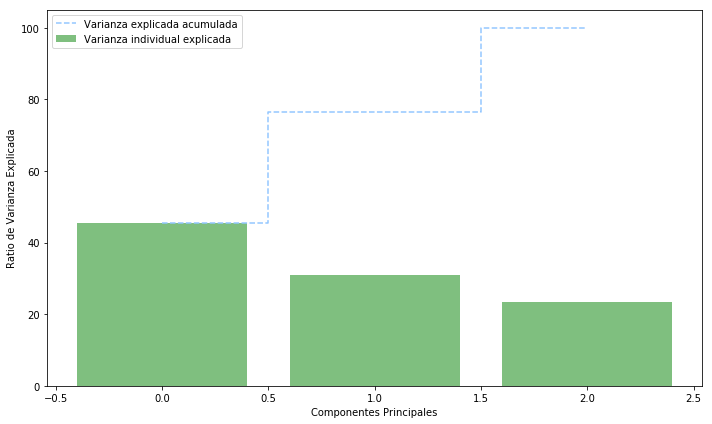

In [61]:
# A partir de los autovalores, calculamos la varianza explicada

tot = sum(eig_vals1)
var_exp = [(i / tot)*100 for i in sorted(eig_vals1, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(3), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [62]:
var_exp

[45.601098474178336, 30.954924637031173, 23.443976888790495]

In [63]:
var_exp[0]+var_exp[1]

76.55602311120951

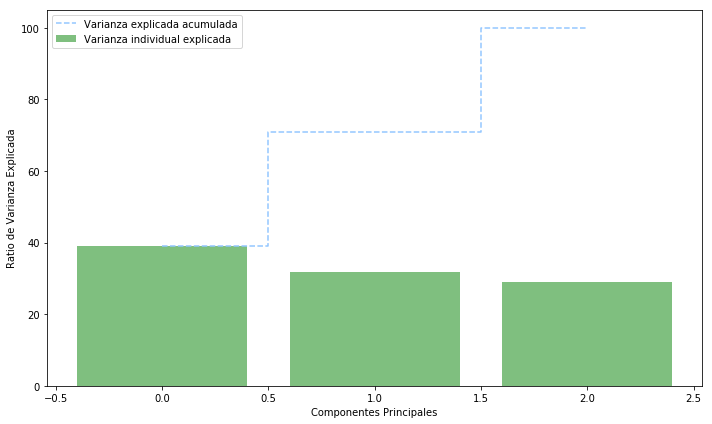

In [64]:
# A partir de los autovalores, calculamos la varianza explicada

tot = sum(eig_vals2)
var_exp = [(i / tot)*100 for i in sorted(eig_vals2, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(3), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [65]:
var_exp[0]+var_exp[1]

70.9208018798013

In [66]:
var_exp[0]+var_exp[1]
var_exp[2]

29.07919812019868

In [68]:
pd.Series(y2).unique()

array(['complete', 'cancelled', 'active', 'unsuccessful'], dtype=object)

## Ejecuto el algoritmo PCA

## muestra 1

In [70]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

## agrego la columna con las etiquetas que me interesan

In [71]:
finalDf = pd.concat([principalDf,pd.Series(y1)], axis = 1)



In [74]:
## Mediante la carga factorial de cada variable original respecto de los componentes seleccionados (1 y 2)
pca.fit(X1std)
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.78166749,  0.03077804],
       [ 0.58783814, -0.72973442],
       [ 0.6430069 ,  0.62970946]])

In [75]:
pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=['PC1', 'PC2'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'])

,PC1,PC2
tender/value/amount,0.781667,0.030778
tender/tenderPeriod/durationInDays,0.587838,-0.729734
tender/items/0/quantity,0.643007,0.629709


In [103]:
## PC1 esta correlacionada con las variables 1 y 3
## PC2 correlacionada con la variable 2

El primer factor esta fuertemente correlacionado con las variables originales 1 (tender/value/amount) y 3 (tender/items/0/quantity),

mientras que el segundo factor esta fuertemente correlacionado con la varible original 2 (tender/tenderPeriod/durationInDays)

# Etiqueto PC1: "Precio y cantidad" en tanto esta afectado por el monto total por el cual el gobierno esta dispuesto a licitar


# Etiqueto PC2: "Duración del proceso" en tanto esta afectado por la duración del proceso licitatorio.        

In [76]:
finalDf.columns=['Precio y cantidad', 'Duración del proceso', 'target']


## Ploteo los resultados

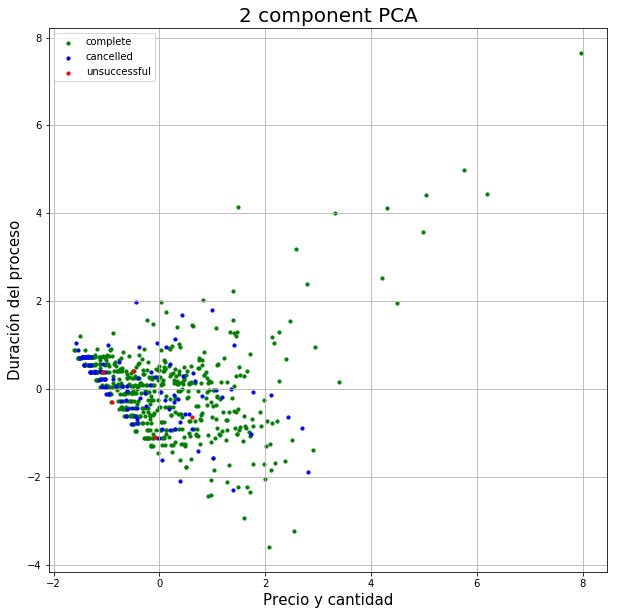

In [79]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', 'cancelled', 'unsuccessful']
colors = [ 'g', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

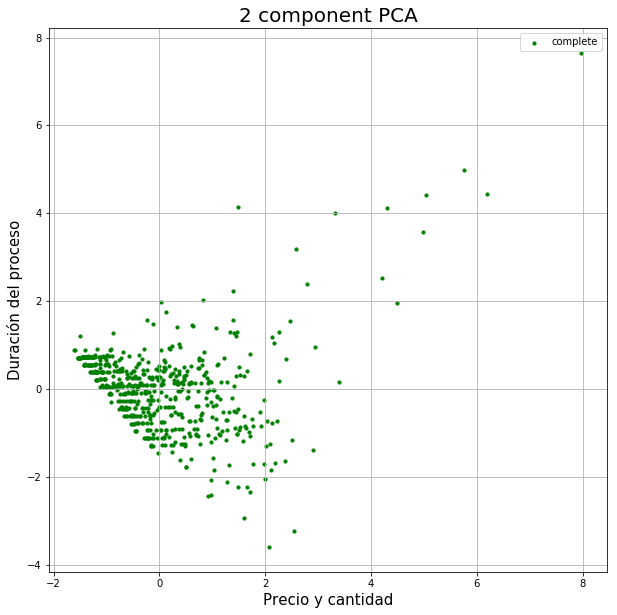

In [80]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', ]
colors = [ 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

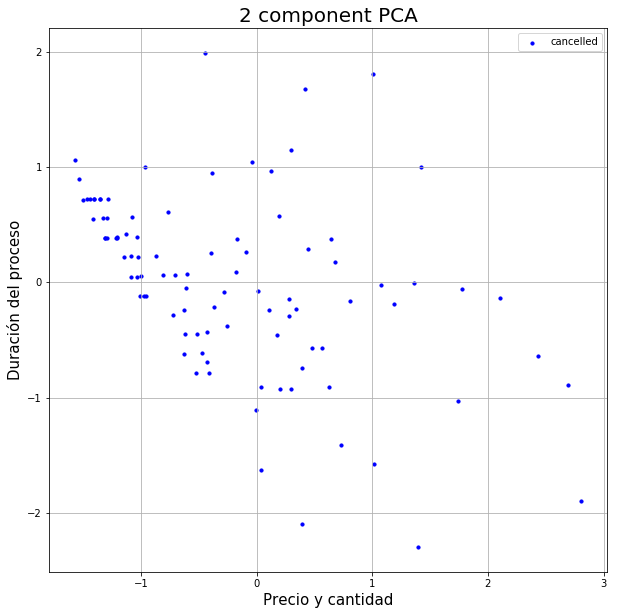

In [81]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [ 'cancelled',]
colors = [  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

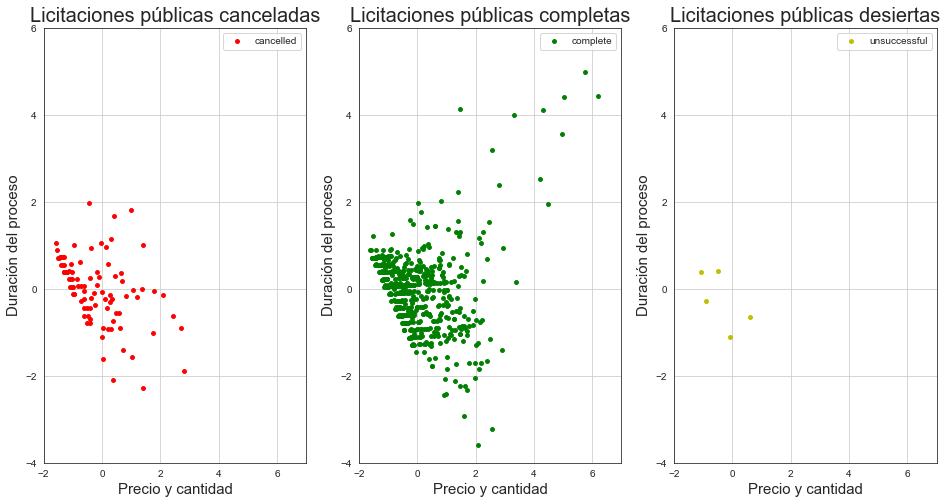

In [92]:
fig, (vax, hax, fax) = plt.subplots(1, 3, figsize=(16, 8))

# ploteo los puntos de los procesos cancelados en el nuevo par de ejes
vax.set_xlabel('Precio y cantidad', fontsize = 15)
vax.set_ylabel('Duración del proceso', fontsize = 15)
vax.set_title('Licitaciones públicas canceladas', fontsize = 20)
vax.set_xlim(-2,7)
vax.set_ylim(-4,6)

targets = ['cancelled']
colors = [ 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    vax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)

vax.legend(targets)
vax.grid()

# ploteo los puntos de los procesos completos en el nuevo par de ejes
hax.set_xlabel('Precio y cantidad', fontsize = 15)
hax.set_ylabel('Duración del proceso', fontsize = 15)
hax.set_title('Licitaciones públicas completas', fontsize = 20)
hax.set_xlim(-2,7)
hax.set_ylim(-4,6)

targets = ['complete']
colors = [ 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    hax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15
               , )
hax.legend(targets)
hax.grid()

# ploteo los puntos de los procesos no exitosos en el nuevo par de ejes
fax.set_xlabel('Precio y cantidad', fontsize = 15)
fax.set_ylabel('Duración del proceso', fontsize = 15)
fax.set_title('Licitaciones públicas desiertas', fontsize = 20)
fax.set_xlim(-2,7)
fax.set_ylim(-4,6)

targets = ['unsuccessful']
colors = [ 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    fax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)
fax.legend(targets)
fax.grid()


## Muestra 2

In [93]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X2std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [94]:
finalDf = pd.concat([principalDf,pd.Series(y2)], axis = 1)


In [95]:
## Mediante la carga factorial de cada variable original respecto de los componentes seleccionados (1 y 2)
pca.fit(X2std)
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.70656346, -0.08726722],
       [ 0.53686157,  0.78468807],
       [ 0.62085668, -0.57921425]])

In [96]:
pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=['PC1', 'PC2'], index=['tender/value/amount', 'tender/tenderPeriod/durationInDays',
       'tender/items/0/quantity'])

,PC1,PC2
tender/value/amount,0.706563,-0.087267
tender/tenderPeriod/durationInDays,0.536862,0.784688
tender/items/0/quantity,0.620857,-0.579214


## Etiqueto PC1: "Precio y cantidad" en tanto esta afectado por el monto total por el cual el gobierno esta dispuesto a licitar
## Etiqueto PC2: "Duración del proceso" en tanto esta afectado por la duración del proceso licitatorio.

In [97]:
finalDf.columns=['Precio y cantidad', 'Duración del proceso', 'target']

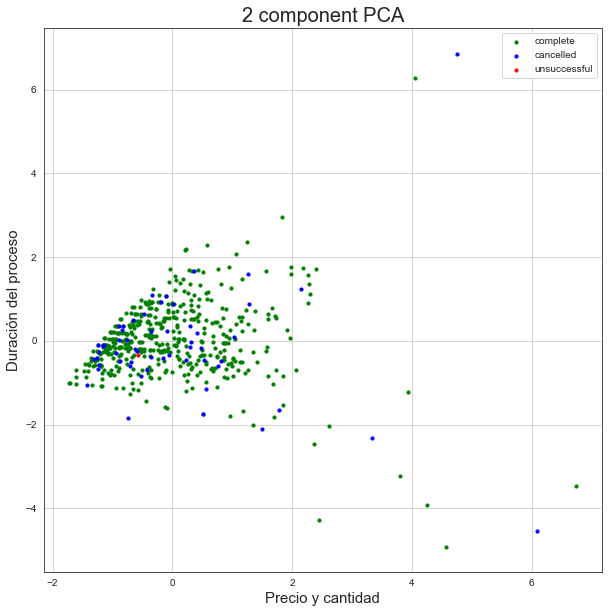

In [98]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', 'cancelled', 'unsuccessful']
colors = [ 'g', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

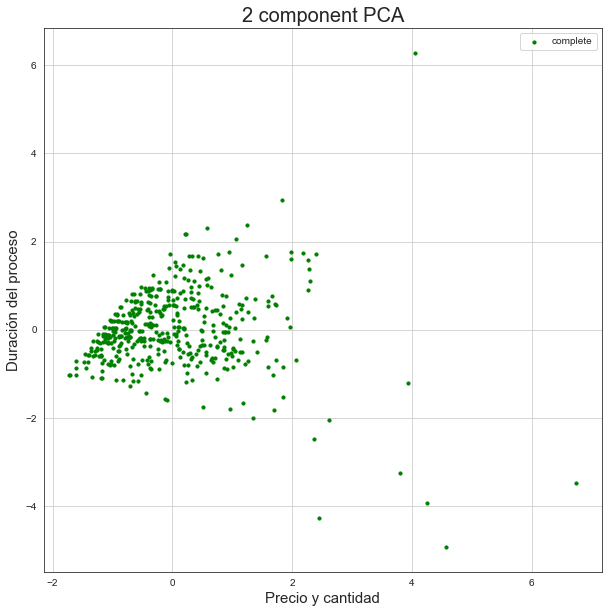

In [99]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Precio y cantidad', fontsize = 15)
ax.set_ylabel('Duración del proceso', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['complete', ]
colors = [ 'g',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

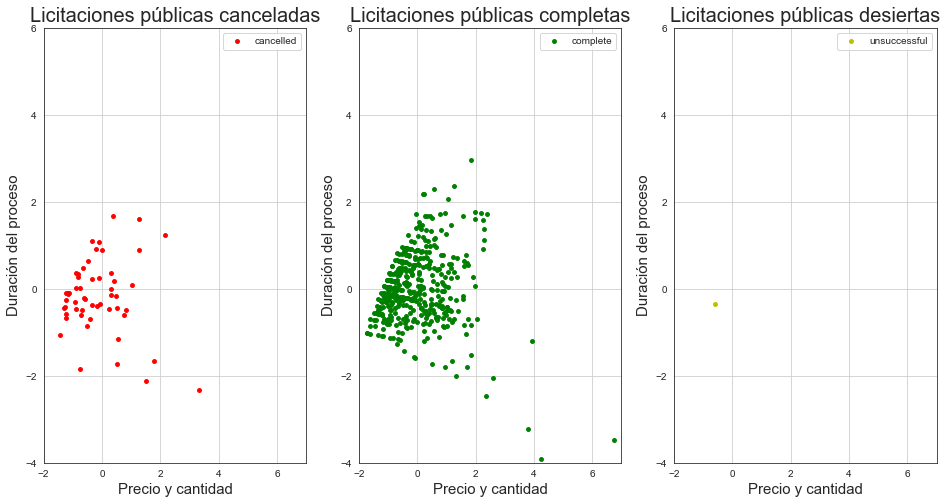

In [100]:
fig, (vax, hax, fax) = plt.subplots(1, 3, figsize=(16, 8))

# ploteo los puntos de los procesos cancelados en el nuevo par de ejes
vax.set_xlabel('Precio y cantidad', fontsize = 15)
vax.set_ylabel('Duración del proceso', fontsize = 15)
vax.set_title('Licitaciones públicas canceladas', fontsize = 20)
vax.set_xlim(-2,7)
vax.set_ylim(-4,6)

targets = ['cancelled']
colors = [ 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    vax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)

vax.legend(targets)
vax.grid()

# ploteo los puntos de los procesos completos en el nuevo par de ejes
hax.set_xlabel('Precio y cantidad', fontsize = 15)
hax.set_ylabel('Duración del proceso', fontsize = 15)
hax.set_title('Licitaciones públicas completas', fontsize = 20)
hax.set_xlim(-2,7)
hax.set_ylim(-4,6)

targets = ['complete']
colors = [ 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    hax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15
               , )
hax.legend(targets)
hax.grid()

# ploteo los puntos de los procesos no exitosos en el nuevo par de ejes
fax.set_xlabel('Precio y cantidad', fontsize = 15)
fax.set_ylabel('Duración del proceso', fontsize = 15)
fax.set_title('Licitaciones públicas desiertas', fontsize = 20)
fax.set_xlim(-2,7)
fax.set_ylim(-4,6)

targets = ['unsuccessful']
colors = [ 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    fax.scatter(finalDf.loc[indicesToKeep, 'Precio y cantidad']
               , finalDf.loc[indicesToKeep, 'Duración del proceso']
               , c = color
               , s = 15)
fax.legend(targets)
fax.grid()